Power data Analysis due to the Pandemic COVID-19:

Here I would like to see how much is power consumption is increased/decreased since there is a lockdown all around USA. People staying home might have increased the power consumption but at the same time offices not being opened should result in a drastic change in power consumption. So let us a take a look and come to a conclusion. 
For this assignment, I am trying to compare the power consumption data from Apr 05 2020 - Apr 12 2020 against Mar 05 2020 - Mar 12 2020

Acquire electrical power data from https://www.bmreports.com/bmrs/?q=demand/rollingsystemdemand/historic for required dates

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT

Downloaded Data from Mar 5, 2020 to Mar 12, 2020 and from Apr 5, 2020 to Apr 12, 2020

#### Loading the required data
RollingSystemDemand_20200413_0349.csv has data from Mar 5, 2020 to Mar 12, 2020

RollingSystemDemand_20200413_0348.csv has data from Apr 5, 2020 to Apr 12, 2020


In [2]:
march_data = pd.read_csv('RollingSystemDemand_20200413_0349.csv', 
                  #sep=r'[\s,]',              # 1
                  header=None, skiprows=1,
                  skipfooter =1,
                  engine = 'python',
                  index_col=False,
                  converters={               # 2
                      1: lambda x: DT.datetime.strptime(x, '%Y%m%d%H%M%S')}
                 )

In [3]:
march_data.head()

,0,1,2
0,VD,2020-03-05 00:00:00,31609
1,VD,2020-03-05 00:05:00,31761
2,VD,2020-03-05 00:10:00,31843
3,VD,2020-03-05 00:15:00,31808
4,VD,2020-03-05 00:20:00,31782


In [4]:
april_data = pd.read_csv('RollingSystemDemand_20200413_0348.csv', 
                  #sep=r'[\s,]',              # 1
                  header=None, skiprows=1,
                  skipfooter=1,
                  engine = 'python',
                  index_col=False,
                  converters={               # 2
                      1: lambda x: DT.datetime.strptime(x, '%Y%m%d%H%M%S')}
                 )

In [5]:
april_data.head()

,0,1,2
0,VD,2020-04-05 00:00:00,21189
1,VD,2020-04-05 00:05:00,21274
2,VD,2020-04-05 00:10:00,21309
3,VD,2020-04-05 00:15:00,21324
4,VD,2020-04-05 00:20:00,21423


There is a column which contains 'VD', I just dont want this in my data, so I have named that column drop and dropping that off from my final data

In [6]:
march_data.columns = ['Drop', 'TimeStamp','Demand']
columns = march_data.columns
drop_cols = ['Drop']
columns_required = [item for item in columns if item not in drop_cols]
march_data = march_data[columns_required]
march_data.columns

Index(['TimeStamp', 'Demand'], dtype='object')

Now, I would want to set my TimeStamp column as index for plotting purposses

In [7]:
march_data = march_data.set_index(march_data['TimeStamp'])

In [8]:
march_data.head()

,TimeStamp,Demand
TimeStamp,,
2020-03-05 00:00:00,2020-03-05 00:00:00,31609
2020-03-05 00:05:00,2020-03-05 00:05:00,31761
2020-03-05 00:10:00,2020-03-05 00:10:00,31843
2020-03-05 00:15:00,2020-03-05 00:15:00,31808
2020-03-05 00:20:00,2020-03-05 00:20:00,31782


Similarly for April Data

In [9]:
april_data.columns = ['Drop', 'TimeStamp','Demand']
columns = april_data.columns
drop_cols = ['Drop']
columns_required = [item for item in columns if item not in drop_cols]
april_data = april_data[columns_required]
april_data = april_data.set_index(april_data['TimeStamp'])
april_data.head()

,TimeStamp,Demand
TimeStamp,,
2020-04-05 00:00:00,2020-04-05 00:00:00,21189
2020-04-05 00:05:00,2020-04-05 00:05:00,21274
2020-04-05 00:10:00,2020-04-05 00:10:00,21309
2020-04-05 00:15:00,2020-04-05 00:15:00,21324
2020-04-05 00:20:00,2020-04-05 00:20:00,21423


### Plot 1: 
#### Bar Graph showing the amount of power consumption each hour.
#### Power consumed in a particular hour over the span of 7 days in March

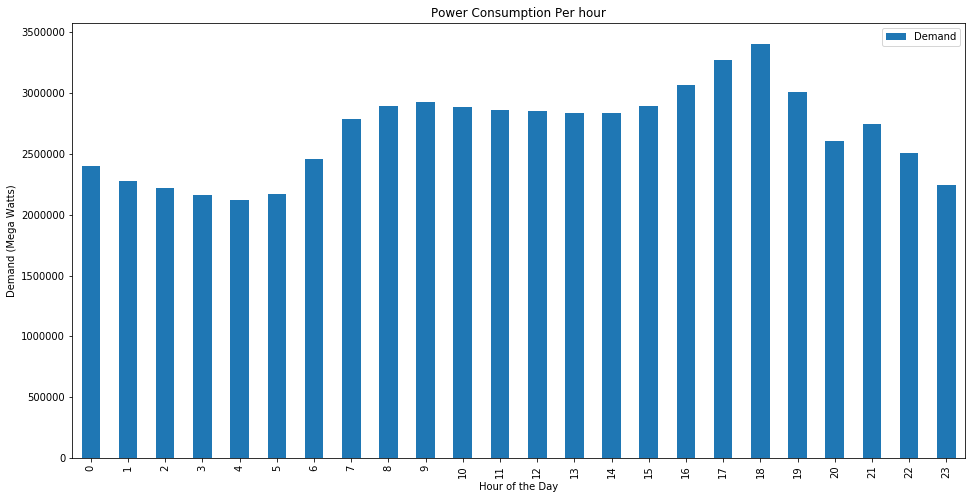

In [10]:
grouped_data_march = march_data.groupby(march_data.index.hour).sum()
plot = grouped_data_march.plot(kind='bar',figsize=(16, 8))
plot.set_title('Power Consumption Per hour')
plot.set_xlabel('Hour of the Day')
plot.set_ylabel('Demand (Mega Watts)')
plt.show()

#### Analysis of hourly consumption of power in a week in March:
 - From the plot it is clear that the power consumption is high from 5pm - 6pm, 6pm-7pm
 - The lowest would be between 4am - 5am.

#### Bar Graph showing the amount of power consumption each hour.
#### Power consumed in a particular hour over the span of 7 days in April

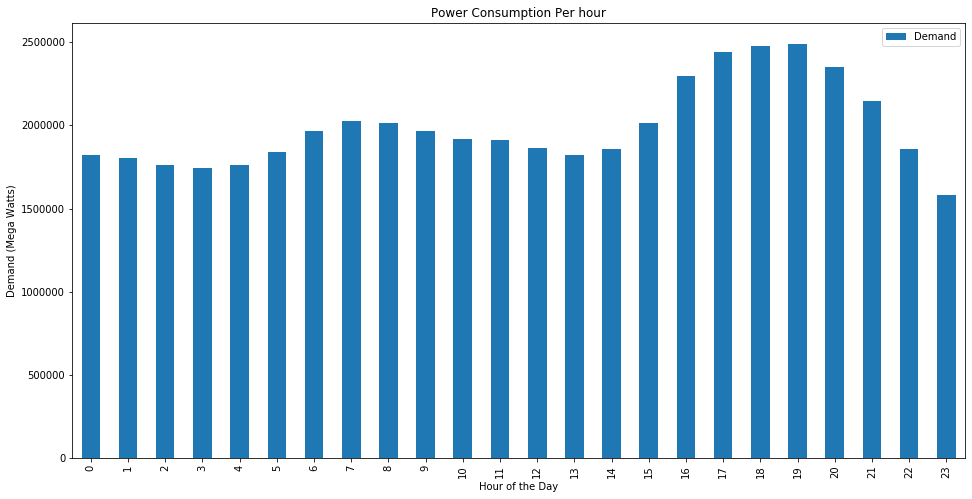

In [11]:
grouped_data_april = april_data.groupby(april_data.index.hour).sum()
plot = grouped_data_april.plot(kind='bar',figsize=(16, 8))
plot.set_title('Power Consumption Per hour')
plot.set_xlabel('Hour of the Day')
plot.set_ylabel('Demand (Mega Watts)')
plt.show()

### Clearly the power consumption has reduced in between 5pm - 8pm, but you can also see that the hike is less when compared to March

### Plot 2: 
#### Bar Graph showing the amount of power consumption each hour every day.
#### This Bar graph has 24 bars for each day (24 hours * 7 days)
#### It shows power consumed on a particular day in a particular hour

#### March Data

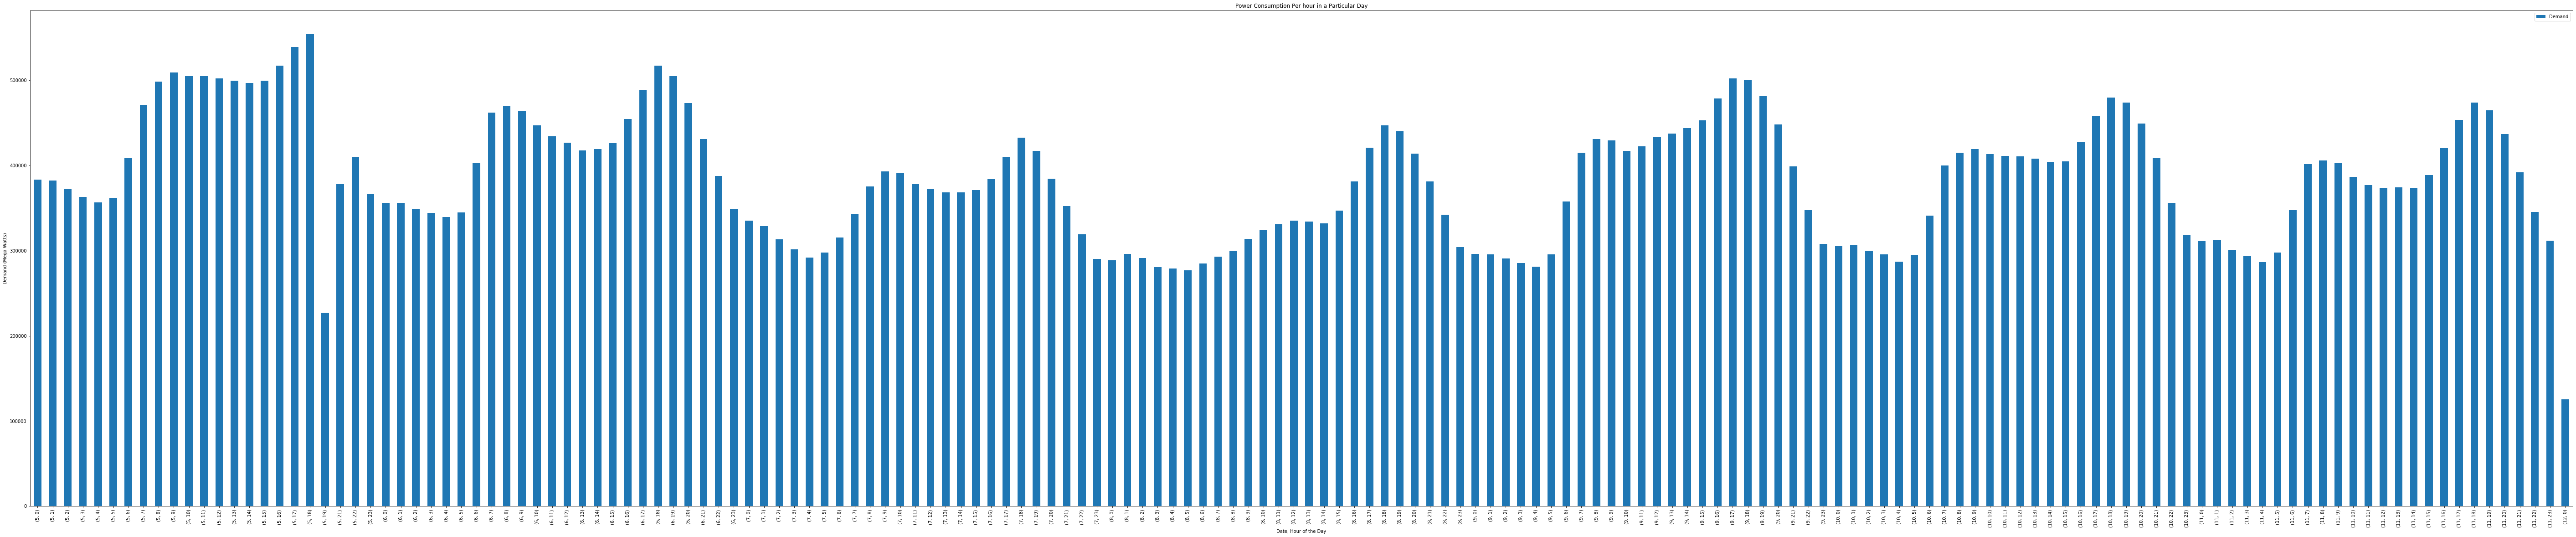

In [12]:
grouped_data_march_2 = march_data.groupby([march_data.index.day, march_data.index.hour]).sum()
plot_2 = grouped_data_march_2.plot(kind='bar',figsize=(100, 20))
plot_2.set_title('Power Consumption Per hour in a Particular Day')
plot_2.set_xlabel('Date, Hour of the Day')
plot_2.set_ylabel('Demand (Mega Watts)')
plt.show()

### <font color = 'red'> Note: 

### <font color='red'> Please double click on the plot to zoom in for a better understanding

#### April Data

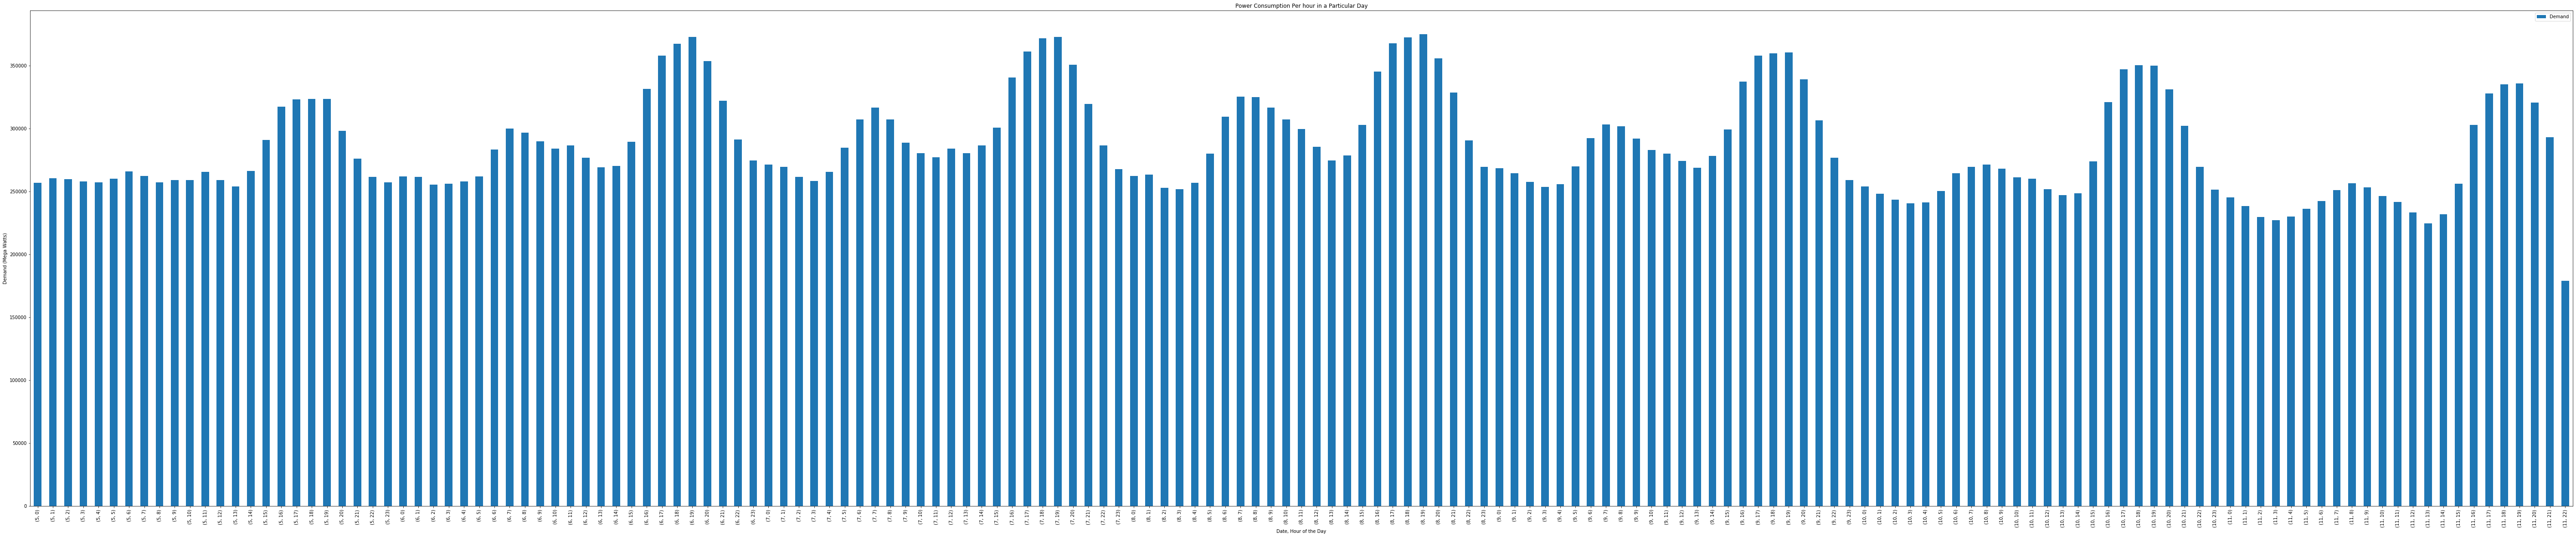

In [13]:
grouped_data_april_2 = april_data.groupby([april_data.index.day, april_data.index.hour]).sum()
plot_2 = grouped_data_april_2.plot(kind='bar',figsize=(100, 20))
plot_2.set_title('Power Consumption Per hour in a Particular Day')
plot_2.set_xlabel('Date, Hour of the Day')
plot_2.set_ylabel('Demand (Mega Watts)')
plt.show()

#### From the above plots it is clear that there is visible difference between the power consumption and it is less when compared to the time of no lockdown